In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [89]:
df = pd.read_csv('Mall_Customers.csv')

In [90]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploring data

## 1. Univariate Analysis

In [91]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


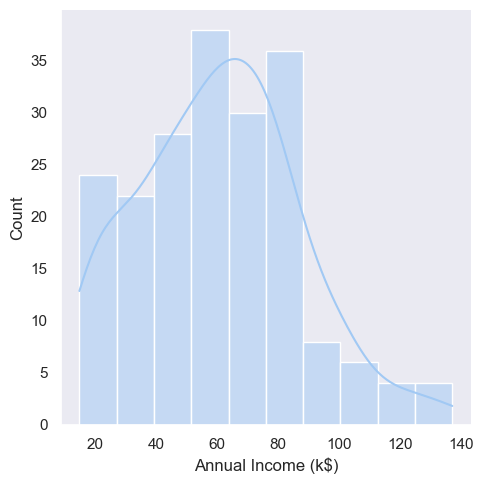

In [92]:
#display annual income distribution
fig = sns.displot(df['Annual Income (k$)'], kde=True)
fig = sns.set_theme(style="dark", palette="pastel")

In [93]:
columns = df.columns
columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

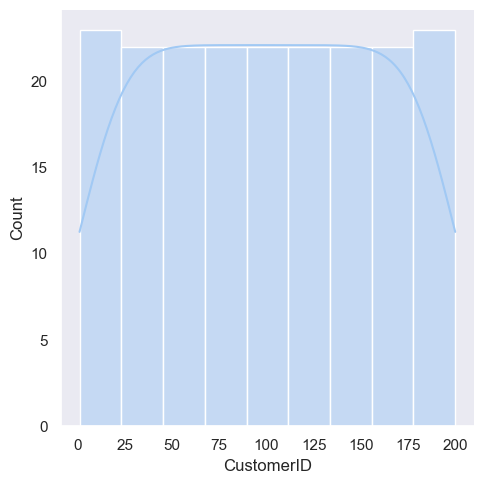

<Figure size 640x480 with 0 Axes>

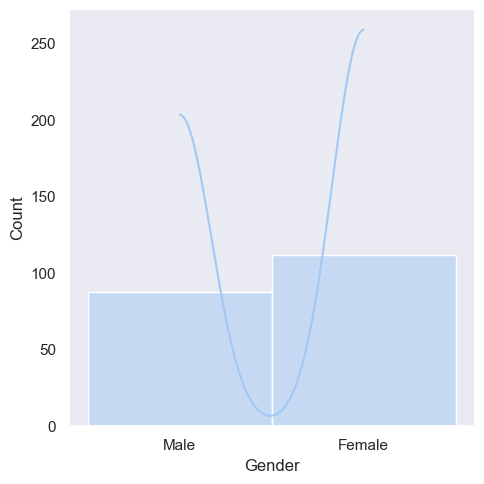

<Figure size 640x480 with 0 Axes>

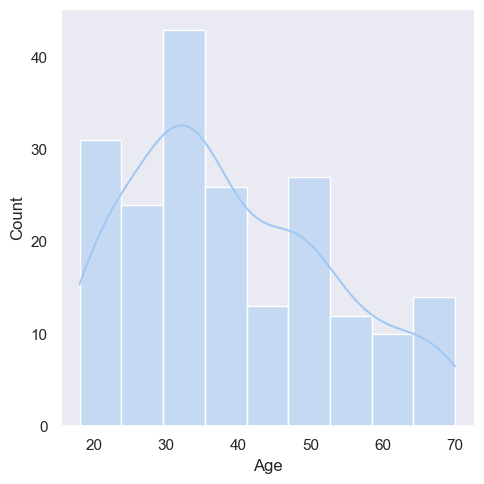

<Figure size 640x480 with 0 Axes>

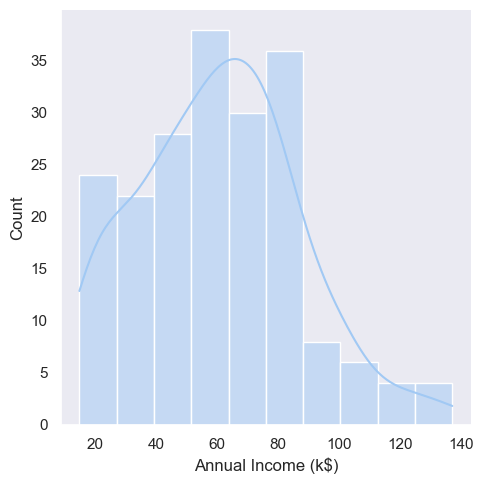

<Figure size 640x480 with 0 Axes>

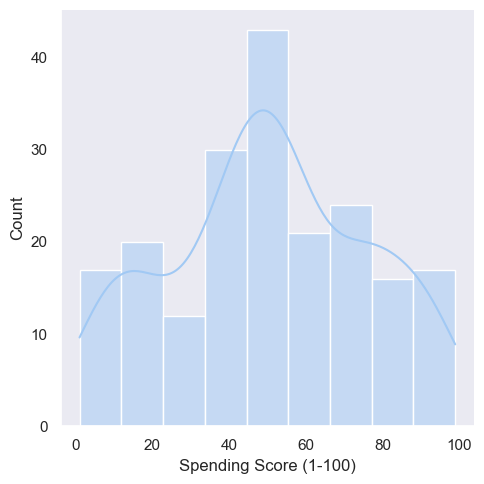

In [94]:
#display distribution of Age, Annual Income and Spending Score(1-100)
for i in columns:
    plt.figure()
    sns.displot(df[i], kde=True)


As indicated, the distribution of Customer ID and Gender are not meaningful. Hence, let's first deep dive in 'Annual Income (k$)' of customer.

In [95]:
df_melted = pd.melt(df, id_vars=['Gender'], value_vars=['Annual Income (k$)'], var_name='Income')
df_melted


,Gender,Income,value
0,Male,Annual Income (k$),15
1,Male,Annual Income (k$),15
2,Female,Annual Income (k$),16
3,Female,Annual Income (k$),16
4,Female,Annual Income (k$),17
...,...,...,...
195,Female,Annual Income (k$),120
196,Female,Annual Income (k$),126
197,Male,Annual Income (k$),126
198,Male,Annual Income (k$),137


/var/folders/yt/z2b0qpf52fxbhbtlsny218m00000gn/T/ipykernel_14824/1554444915.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  fig = sns.kdeplot(df_melted, shade = True, hue='Gender', x='value', palette='crest', linewidth=0)


[Text(0.5, 1.0, 'Income distribution by Gender'),
 Text(0.5, 0, 'Annual Income (k$)')]

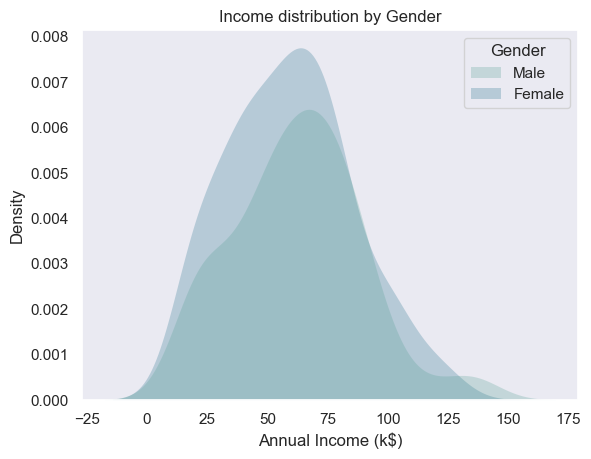

In [96]:
#display kdeplot of Annual Income by Gender
fig = sns.kdeplot(df_melted, shade = True, hue='Gender', x='value', palette='crest', linewidth=0)
fig.set(title='Income distribution by Gender', xlabel='Annual Income (k$)')

Explore distribution of Age across Male and Female.

/var/folders/yt/z2b0qpf52fxbhbtlsny218m00000gn/T/ipykernel_14824/286813374.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  fig = sns.kdeplot(df_melted_age, shade = True, hue='Gender', x='value', palette='flare', linewidth=0)


[Text(0.5, 1.0, 'Age distribution by Gender'), Text(0.5, 0, 'Age')]

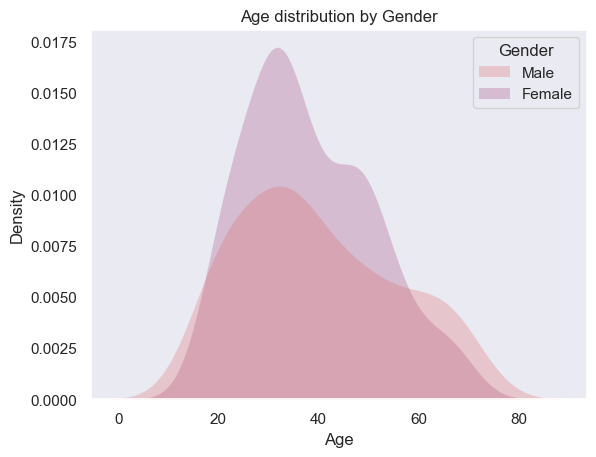

In [97]:
df_melted_age = pd.melt(df, id_vars=['Gender'], value_vars=['Age'], var_name='Age')
#display kdeplot of Age by Gender
fig = sns.kdeplot(df_melted_age, shade = True, hue='Gender', x='value', palette='flare', linewidth=0)
fig.set(title='Age distribution by Gender', xlabel='Age')

In [98]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

## 2. Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

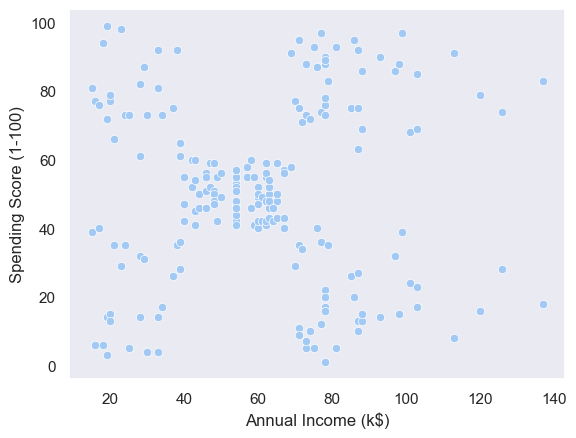

In [99]:
sns.scatterplot(df, x='Annual Income (k$)', y='Spending Score (1-100)')

As indicated, scatter plot between Annual Income and Spending Score plot into 5 clusters. Whereas, CustomerID does not provide any further information. Hence, we will drop CustomerID column in this dataset.

In [100]:
df = df.drop('CustomerID', axis=1)

Now generate information by Gender.

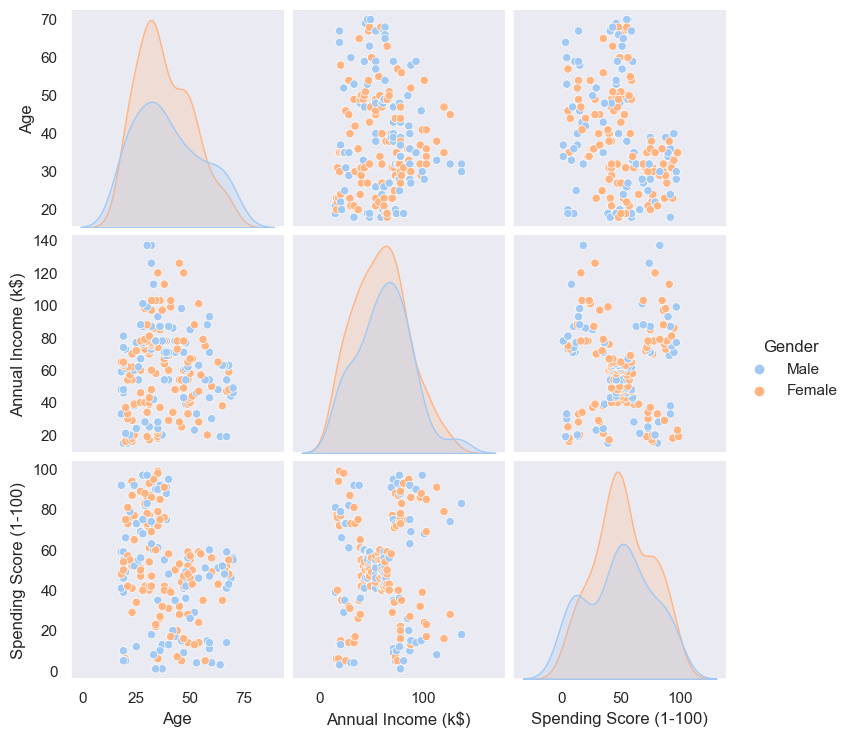

In [102]:
sns.pairplot(df, hue='Gender')

In [103]:
df.groupby(['Gender'])['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

/var/folders/yt/z2b0qpf52fxbhbtlsny218m00000gn/T/ipykernel_14824/3477850498.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Gender'])['Age','Annual Income (k$)','Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


While mean Annual Income of Female is lower than Male, their Spending Score is higher than Male. Is this because of age? Let's go through correlation of variable.

In [104]:
df.corr()

/var/folders/yt/z2b0qpf52fxbhbtlsny218m00000gn/T/ipykernel_14824/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


/var/folders/yt/z2b0qpf52fxbhbtlsny218m00000gn/T/ipykernel_14824/2529832390.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_heatmap = sns.heatmap(df.corr(), annot=True, cmap='rocket')


[Text(0.5, 1.0, 'Correlation between Age, Annual Income and Spending Score')]

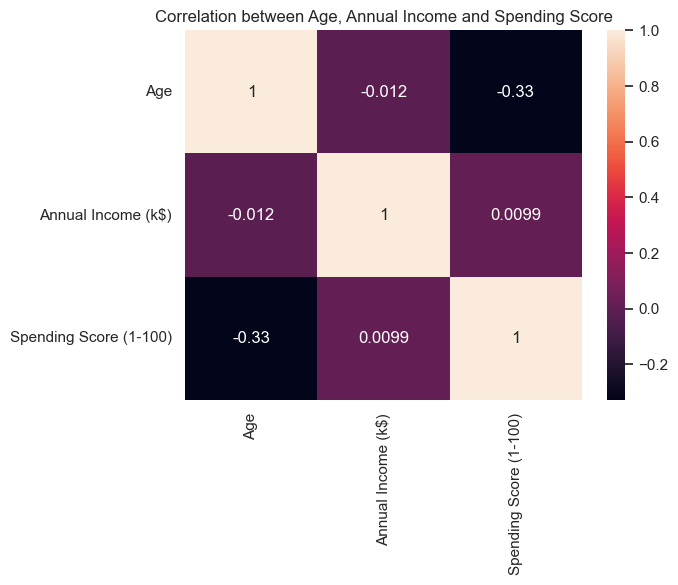

In [113]:
#display correlation in heatmap
corr_heatmap = sns.heatmap(df.corr(), annot=True, cmap='rocket')
corr_heatmap.set(title='Correlation between Age, Annual Income and Spending Score')

# Bivariate Clustering


In [115]:
clustering1 = KMeans(n_clusters=5)
clustering1.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering1.labels_ 
df.head()

/Users/thaonguyen/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending and Income Cluster
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3


/Users/thaonguyen/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/thaonguyen/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/thaonguyen/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/thaonguyen/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

Text(0.5, 1.0, 'Elbow Method')

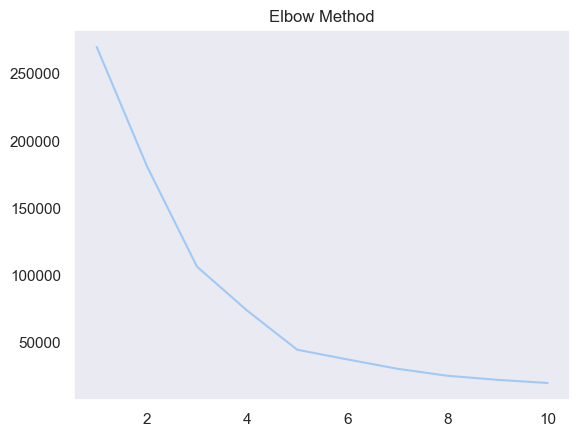

In [117]:
#optimize cluster by visualize Elbow Method
inertia_score = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_score.append(kmeans.inertia_)
plt.plot(range(1,11), inertia_score)
plt.title('Elbow Method')

The Elbow is at 5 so number of cluster that applied in this model is 5.

In [130]:
#add centroid to cluster cluster center (x,y)
center = pd.DataFrame(clustering1.cluster_centers_)
center.columns = ['x', 'y']

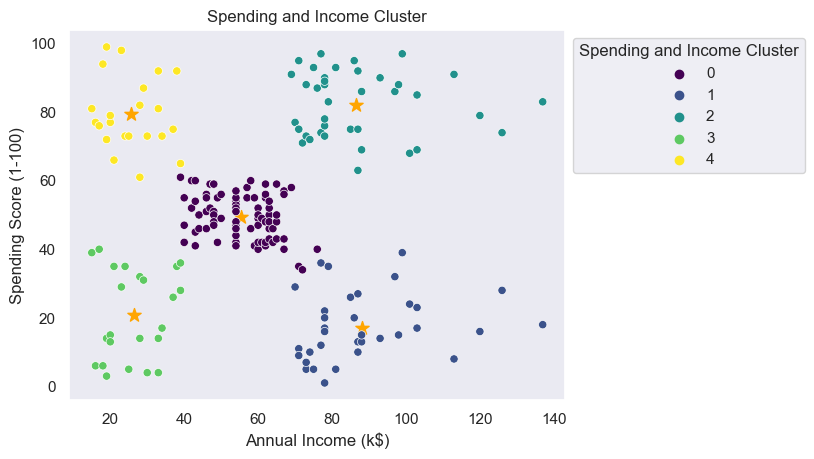

In [132]:
#display Clustering1
plt.scatter(x=center['x'], y=center['y'], s=100, c='orange', marker='*')
clustering1_scatter = sns.scatterplot(df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                                      hue='Spending and Income Cluster', palette='viridis')
clustering1_scatter.set(title = 'Spending and Income Cluster')
sns.move_legend(clustering1_scatter, "upper left", bbox_to_anchor=(1, 1))

In [147]:
#save df as csv file in case of further analysis
#df.to_csv('Clustering-KMeans.csv')

Both cluster number 2 and 4 have high Spending Score (>60). Let's specify in each cluster consists of how many Male and Female?

In [133]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.457143,0.542857
2,0.538462,0.461538
3,0.608696,0.391304
4,0.590909,0.409091


Both cluster number 2 and 4 customers are mostly Female.

In [134]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

/var/folders/yt/z2b0qpf52fxbhbtlsny218m00000gn/T/ipykernel_14824/3377424848.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


# Conclusion

- Cluster 4: who are at young age (average 25 yo) but high spending. Assumption is that this group maybe rarely buy product from this firm, but each time with high value. This is a potential cluster to run campaign.
- Cluster 4 shows an interest for Sales event on popular items in this cluster. 
- Cluster 2: who are more senior than number 4, and they spend a lot on product. This is also a second potential cluster that needed to take action.
- More than half Cluster 2 are Female shoppers. We should come up with appropriate marketing campaign to attract these customers targeting popular items in this cluster.
